# Visualising with matplotlib

[matplotlib](https://matplotlib.org) is the OG plotting library in Python.
If you want to do powerful or basic visualization in Python, matplotlib is a great place to start.

The challenge comes from matplotlib's power. You can draw _anything_ in matplotlib.
That's great, but can lead to a complex and sometimes confusing interface.

matplotlib's strength and origins are in _publication quality graphics_,
that is creating highly precise figures for use in papers, etc.



In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.plot?

Signature: plt.plot(*args, scalex=True, scaley=True, data=None, **kwargs)
Docstring:
Plot y versus x as lines and/or markers.

Call signatures::

    plot([x], y, [fmt], *, data=None, **kwargs)
    plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)

The coordinates of the points or line nodes are given by *x*, *y*.

The optional parameter *fmt* is a convenient way for defining basic
formatting like color, marker and linestyle. It's a shortcut string
notation described in the *Notes* section below.

>>> plot(x, y)        # plot x and y using default line style and color
>>> plot(x, y, 'bo')  # plot x and y using blue circle markers
>>> plot(y)           # plot y using x as index array 0..N-1
>>> plot(y, 'r+')     # ditto, but with red plusses

You can use `.Line2D` properties as keyword arguments for more
control on the appearance. Line properties and *fmt* can be mixed.
The following two calls yield identical results:

>>> plot(x, y, 'go--', linewidth=2, markersize=12)
>>> plot(x, y,

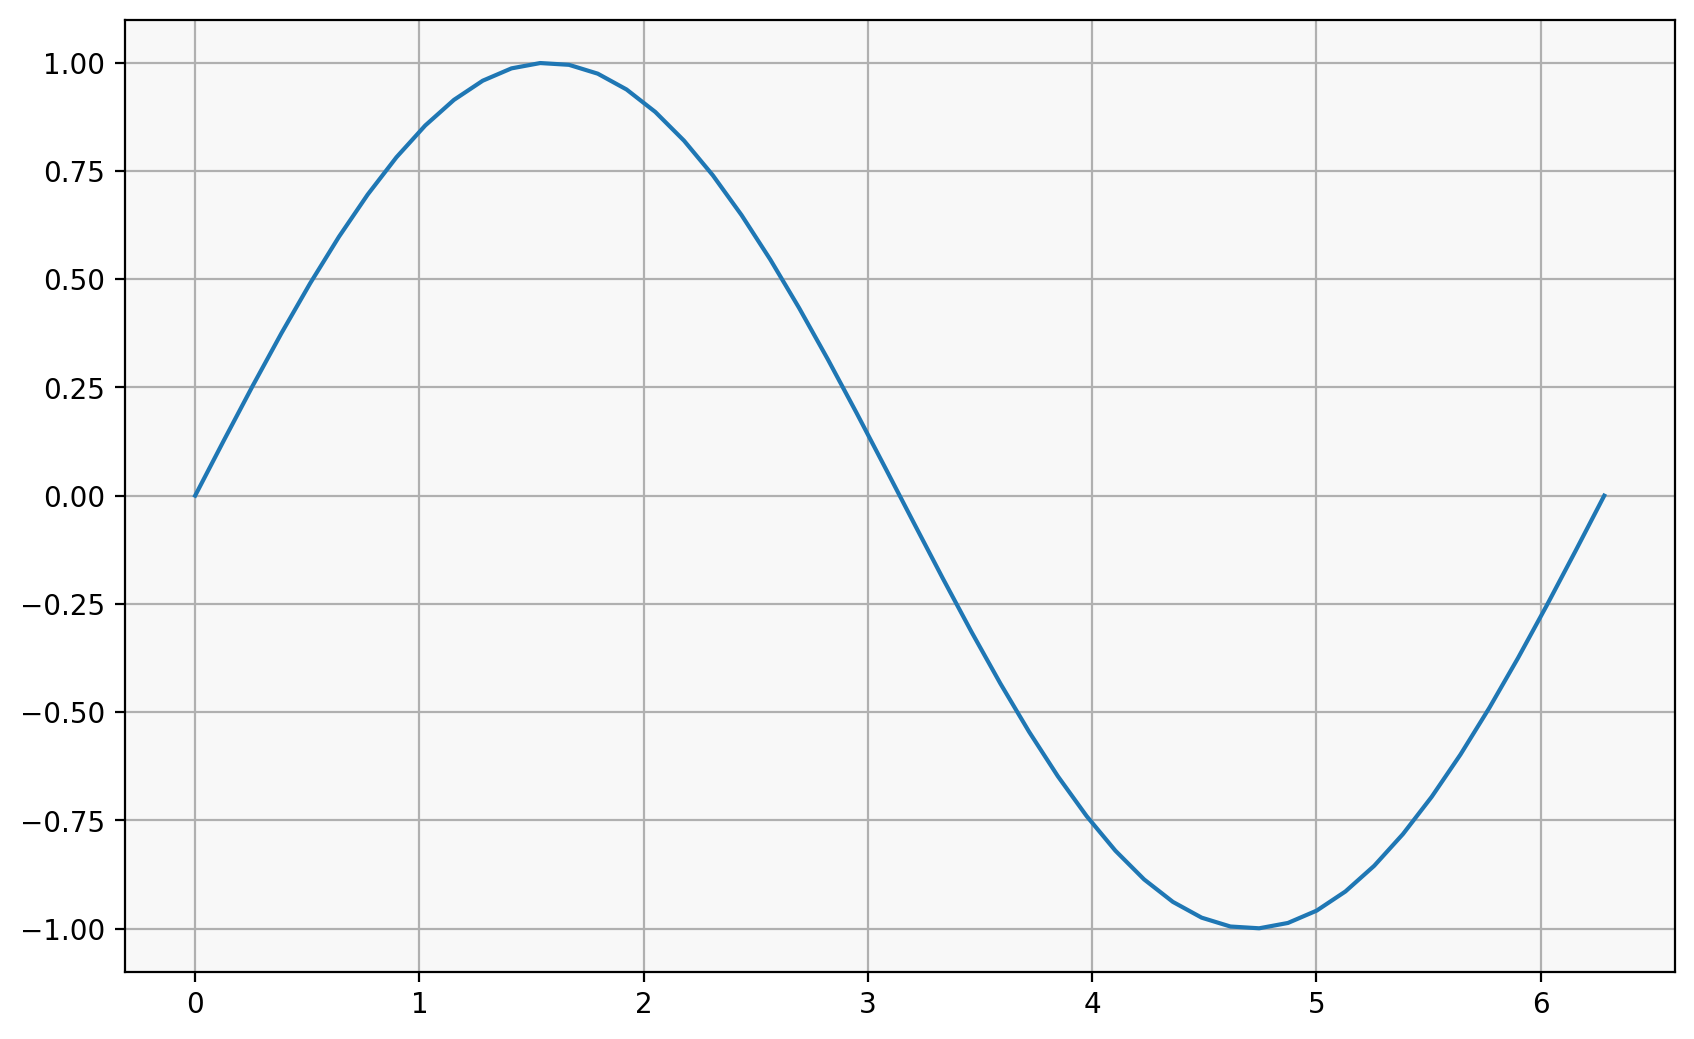

In [3]:
x = np.linspace(0, 2 * np.pi)
y = np.sin(x)

plt.plot(x, y)

When creating a figure,
there is a "figure" object and an "axes" object.

The "axes" is like a single plot, while the _figure_ is like a single _image_, which may contain multiple plots:

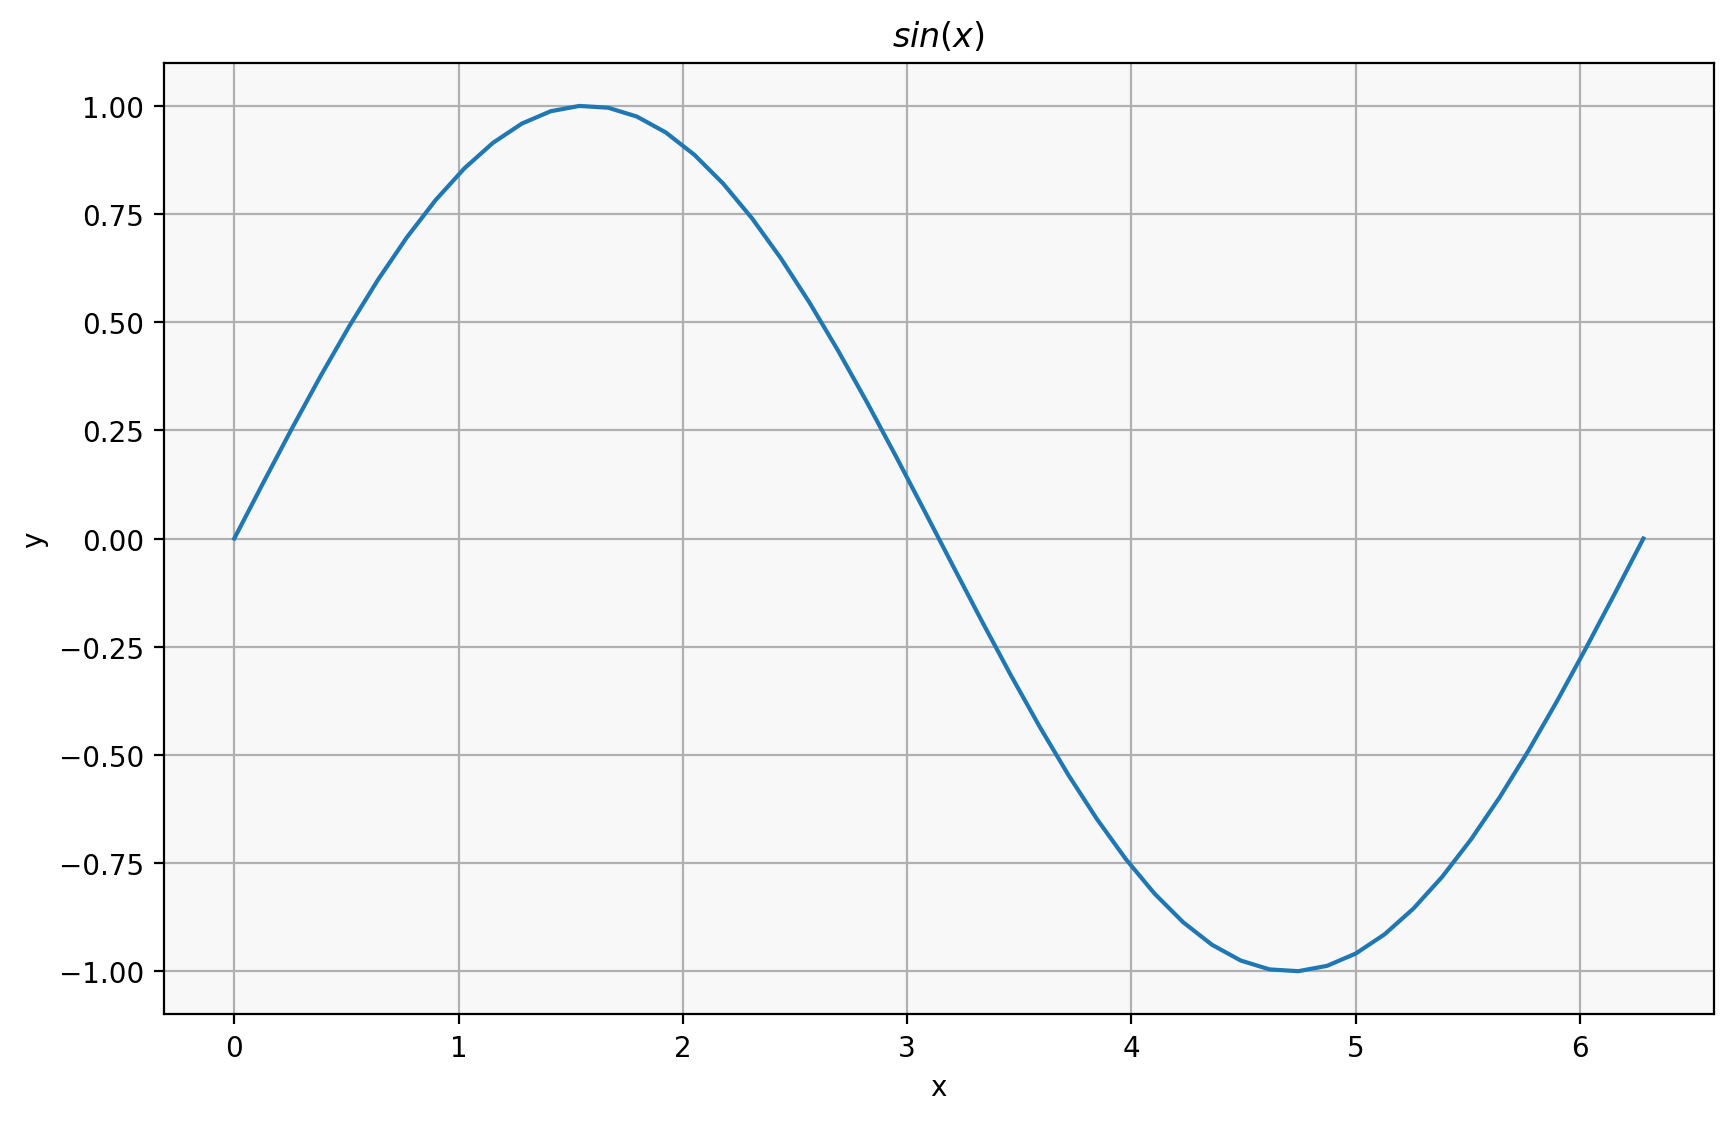

In [4]:
fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_title("$sin(x)$")
ax.set_xlabel("x")
ax.set_ylabel("y");

Text(0.5, 0, 'x')

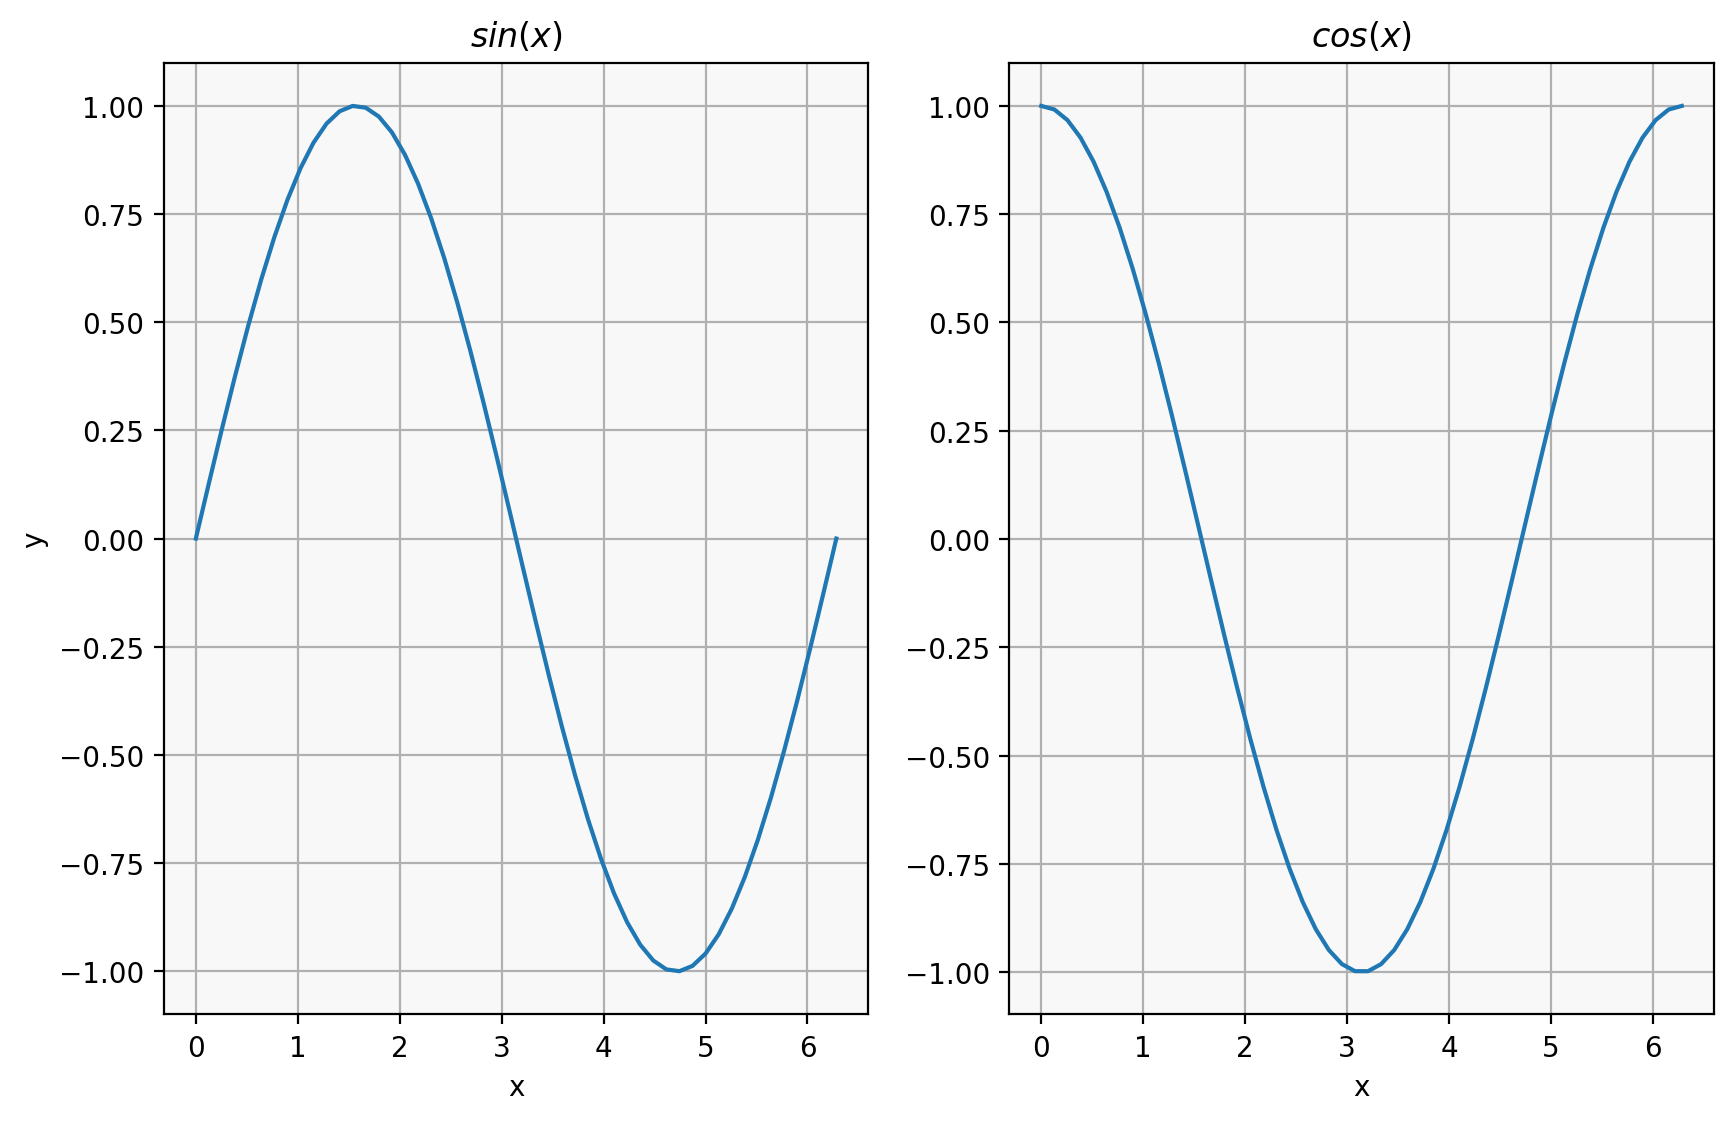

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(x, np.sin(x))
ax1.set_title("$sin(x)$")
ax1.set_xlabel("x")
ax1.set_ylabel("y")

ax2.plot(x, np.cos(x))
ax2.set_title("$cos(x)$")
ax2.set_xlabel("x")

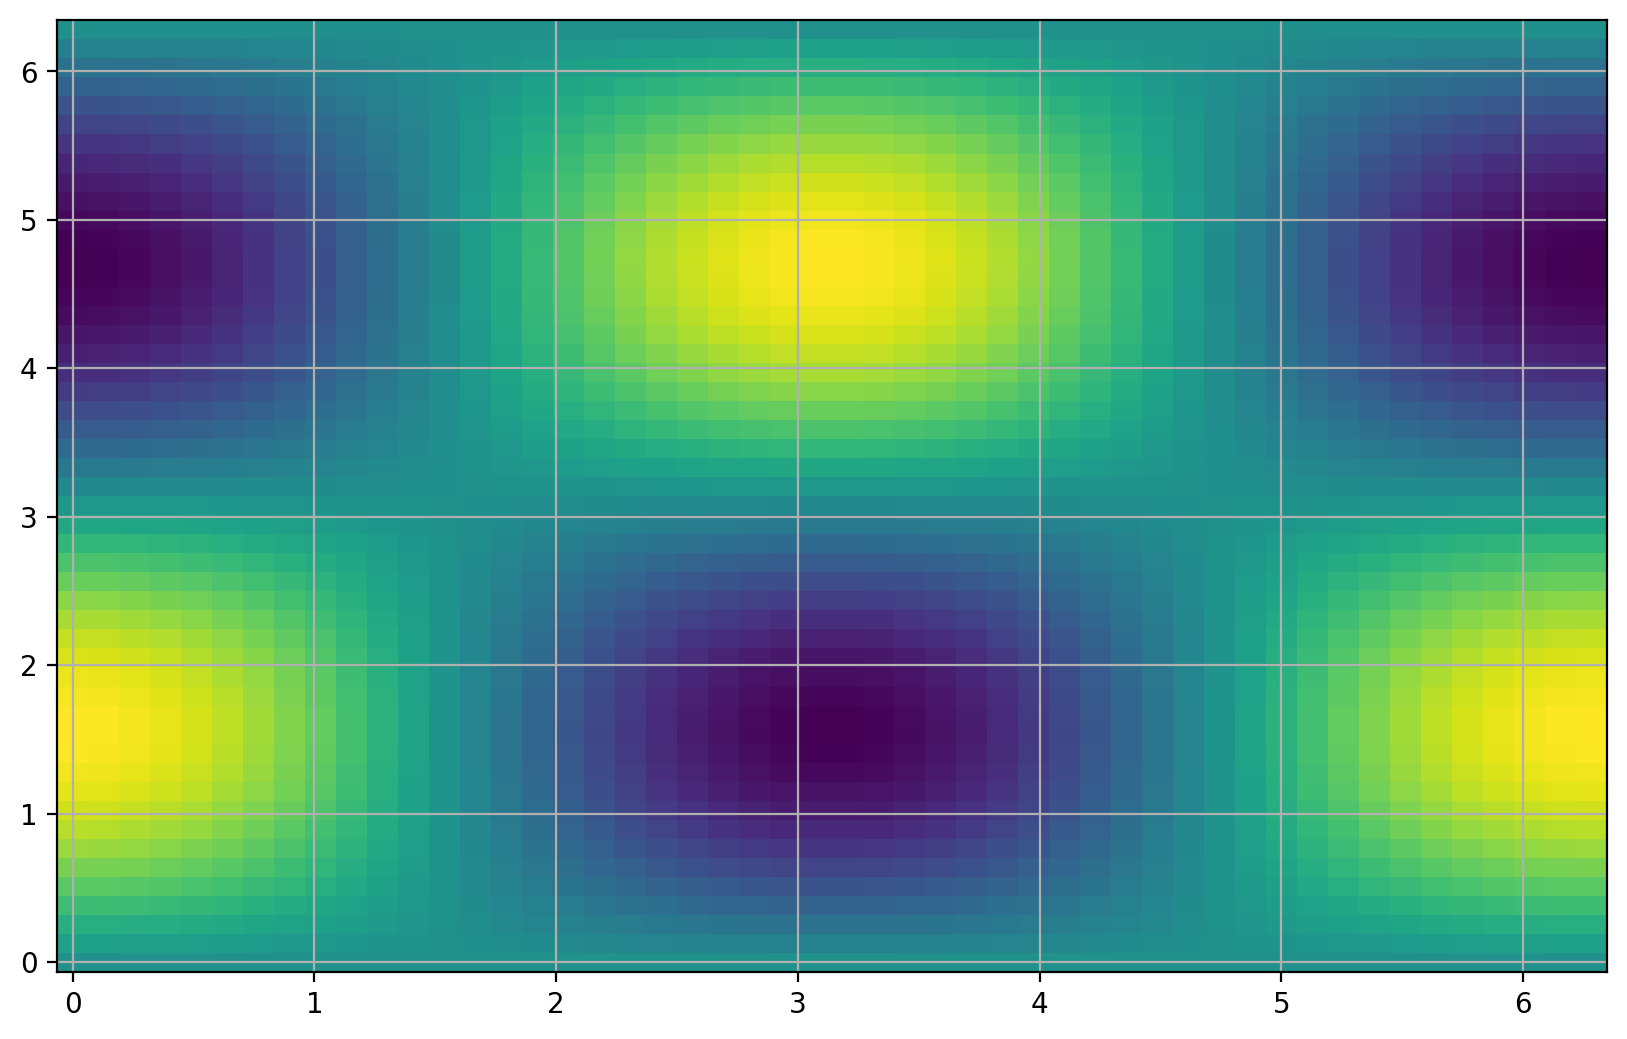

In [7]:
C = np.outer(np.sin(x), np.cos(x))
plt.pcolor(x, x, C)

## Example: weather forecasts

`forecasts.py` contains some sample code from the Public APIs notebook
for fetching forecast data.

In [9]:
import pandas as pd
from forecasting import city_forecast

forecasts = pd.concat(
    city_forecast(city) for city in ("Oslo", "Bergen", " Tromsø", "Trondheim")
)
forecasts

,time,air_pressure_at_sea_level,air_temperature,cloud_area_fraction,relative_humidity,wind_from_direction,wind_speed,next_12_hours_symbol_code,next_1_hours_symbol_code,next_1_hours_precipitation_amount,next_6_hours_symbol_code,next_6_hours_precipitation_amount,city
0,2023-10-24 11:00:00+00:00,1017.7,7.6,99.9,82.5,59.8,3.3,partlycloudy,cloudy,0.0,partlycloudy,0.0,Oslo
1,2023-10-24 12:00:00+00:00,1017.5,7.7,99.8,80.1,58.4,3.4,partlycloudy,cloudy,0.0,partlycloudy,0.0,Oslo
2,2023-10-24 13:00:00+00:00,1017.4,7.6,99.3,79.1,56.9,3.4,partlycloudy,cloudy,0.0,partlycloudy,0.0,Oslo
3,2023-10-24 14:00:00+00:00,1017.3,7.7,98.3,78.7,54.1,3.4,partlycloudy,cloudy,0.0,fair,0.0,Oslo
4,2023-10-24 15:00:00+00:00,1017.3,7.5,93.0,79.2,53.1,3.6,partlycloudy,cloudy,0.0,fair,0.0,Oslo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,2023-11-02 06:00:00+00:00,1008.3,2.0,48.4,84.4,171.3,2.3,lightrainshowers,NaN,NaN,partlycloudy,0.0,Trondheim
82,2023-11-02 12:00:00+00:00,1014.3,4.7,60.5,71.0,121.3,2.2,lightrain,NaN,NaN,rainshowers,2.1,Trondheim
83,2023-11-02 18:00:00+00:00,1010.1,1.9,100.0,85.6,144.1,2.4,cloudy,NaN,NaN,cloudy,0.0,Trondheim
84,2023-11-03 00:00:00+00:00,1008.1,2.9,99.6,85.3,152.2,2.4,NaN,NaN,NaN,cloudy,0.0,Trondheim


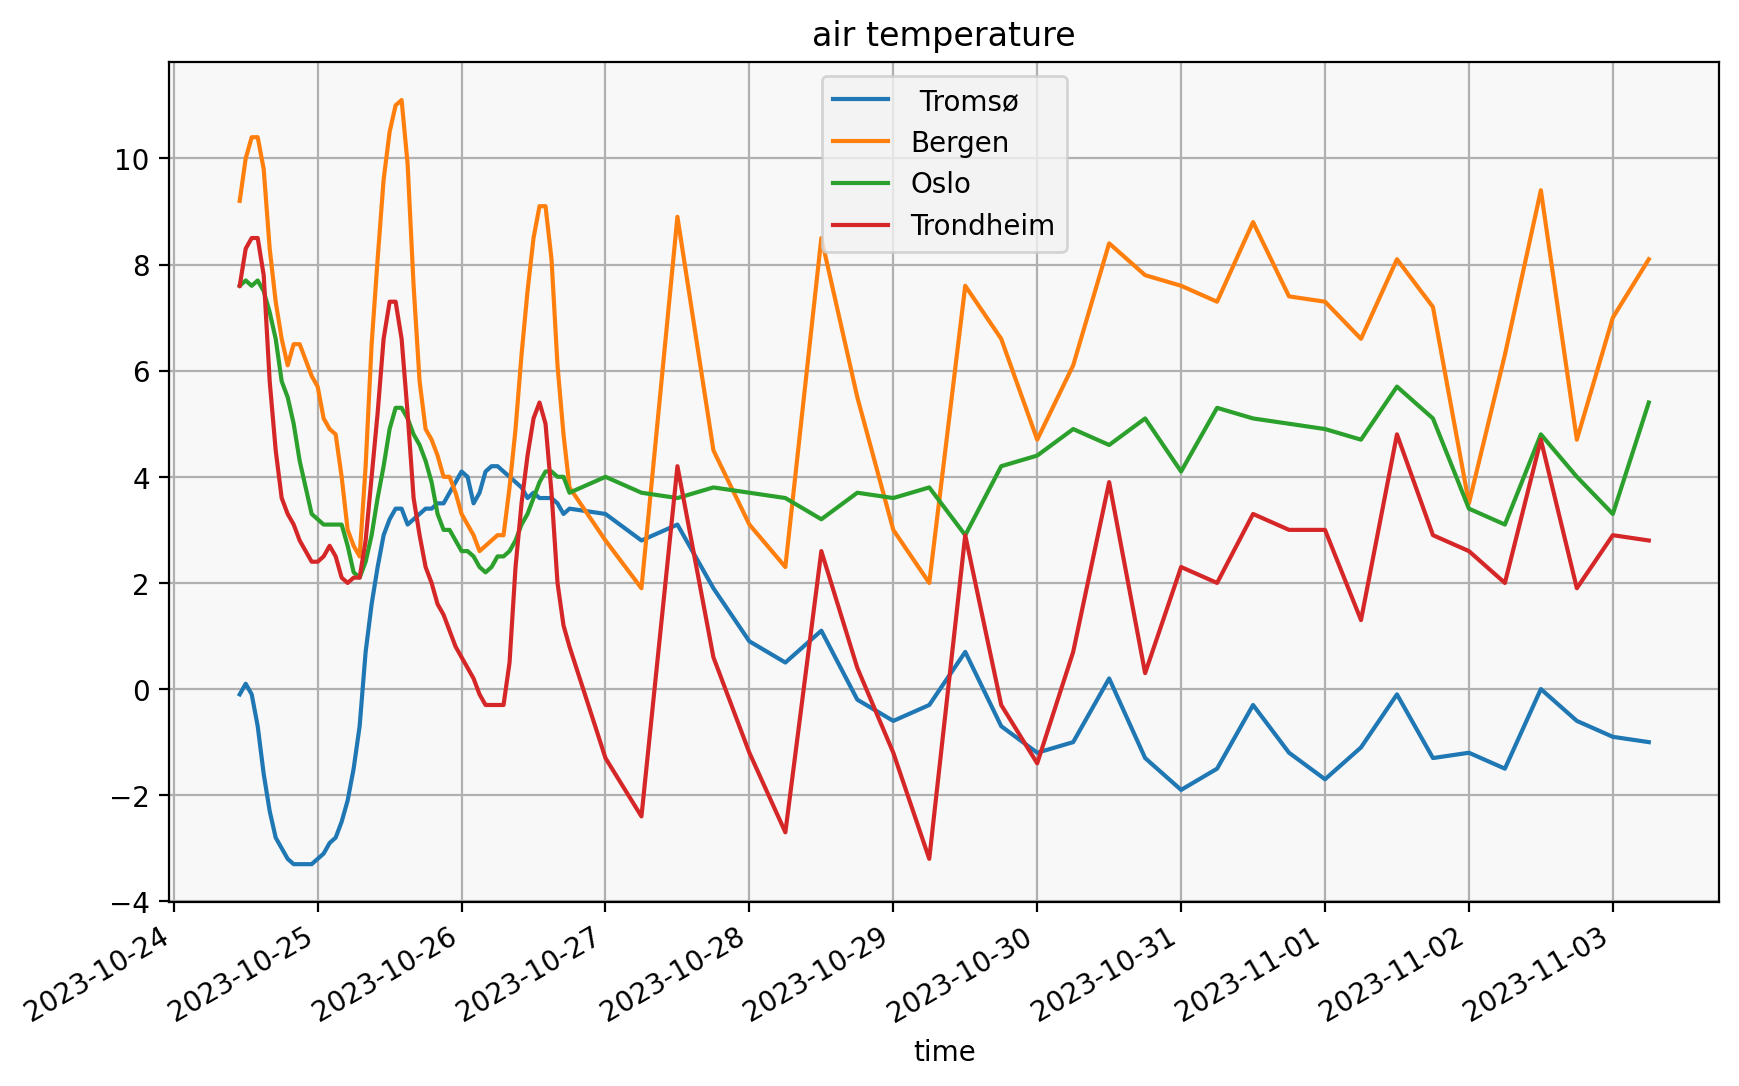

In [10]:
fig, ax = plt.subplots()
ax.set_title("air temperature")
for city, city_df in forecasts.groupby("city"):
    city_df.plot(x="time", y="air_temperature", ax=ax, label=city)

<BarContainer object of 6 artists>

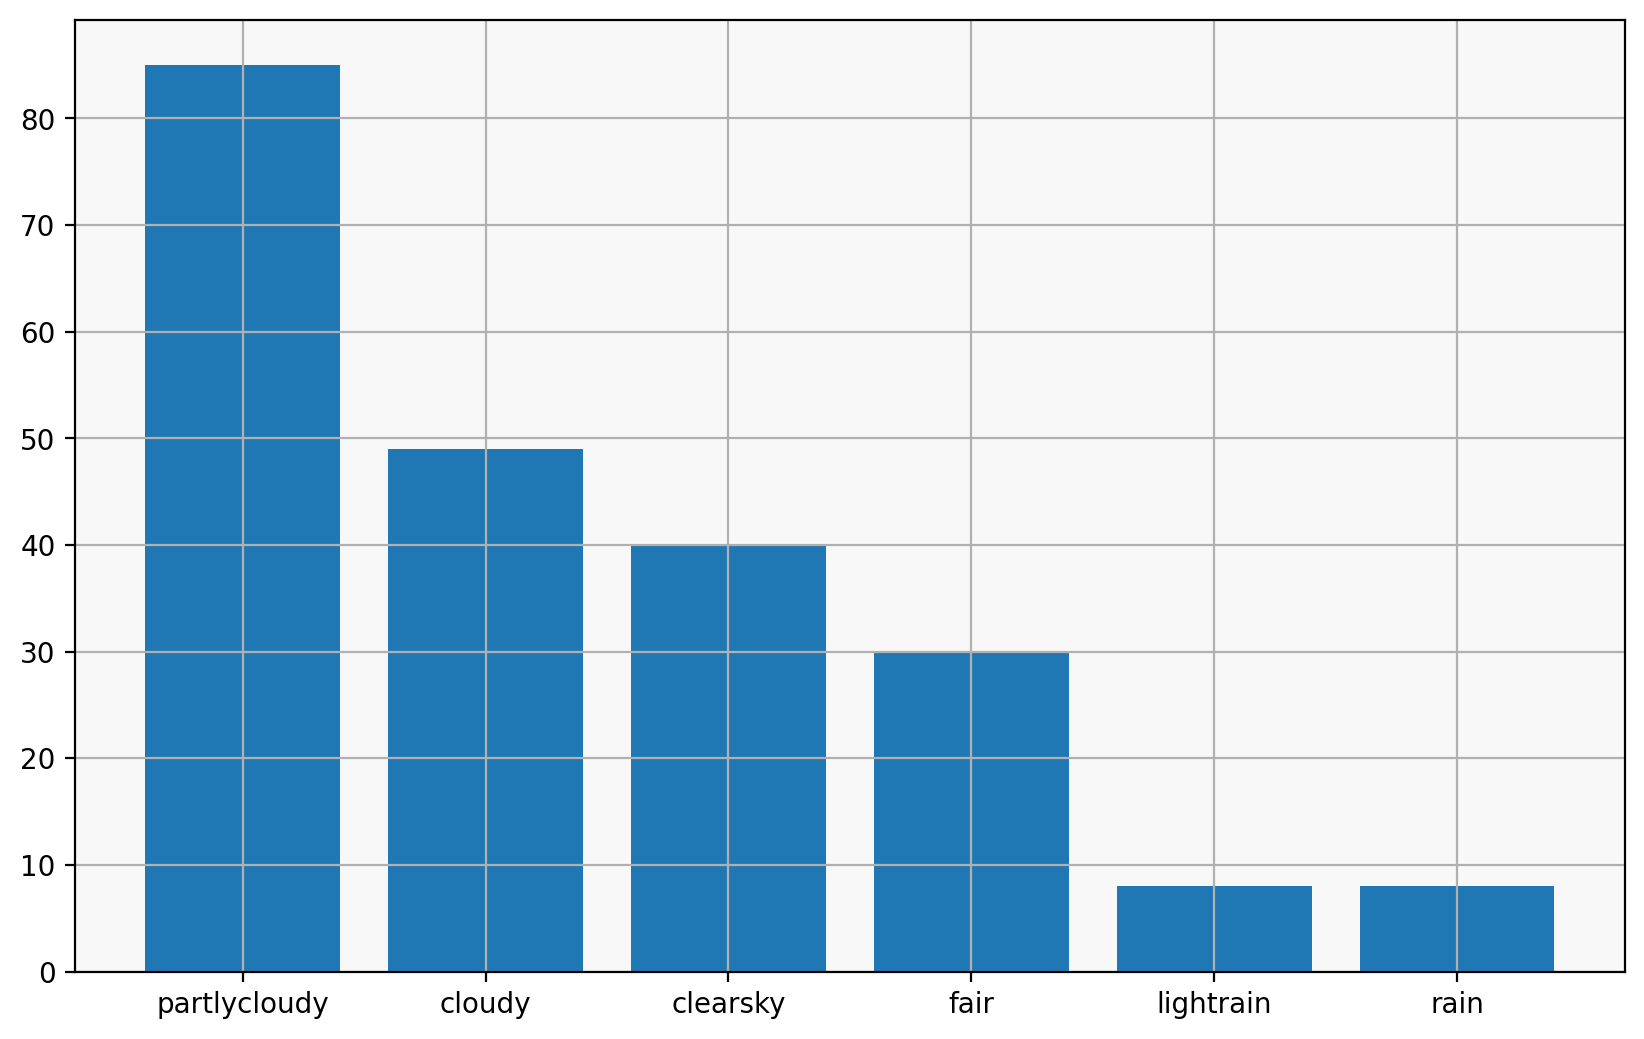

In [11]:
values = forecasts.next_1_hours_symbol_code.value_counts()
plt.bar(values.index, values.values)

I can also use pandas' own plotting methods to produce a similar chart:

<Axes: xlabel='next_1_hours_symbol_code'>

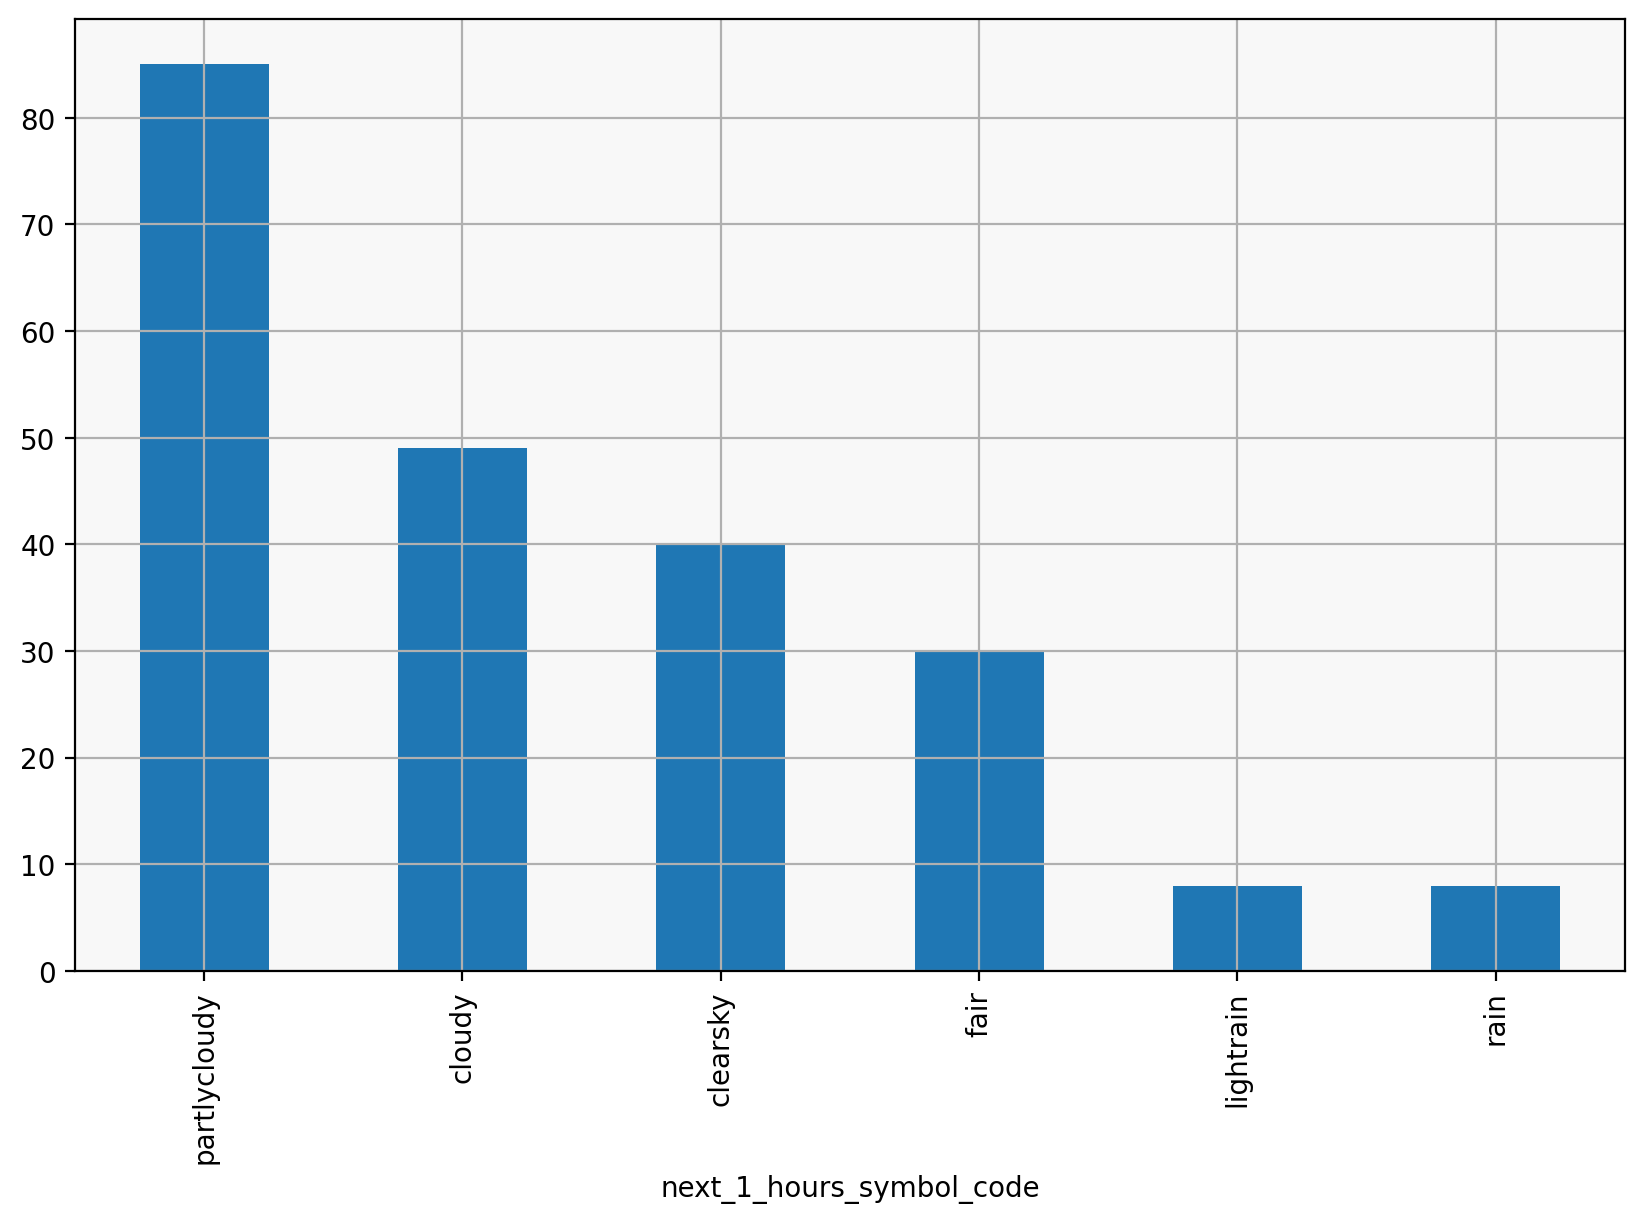

In [12]:
values.plot(kind="bar")

## Summary

- matplotlib is a great and powerful tool, which lets you do just about anything.
- pandas has some nice built-in plotting to visualise tabular data,
  but you can always extract the data and plot it with your own calls to matplotlib.
- there's often a lot of _python_ code to group and slice and organize data for plotting.


## Further reading

Because matplotlib can do so much, a great way to get started is looking through the matplotlib [gallery](https://matplotlib.org/stable/gallery) for a figure that looks _like_ what you want, and start from there, replacing the sample data with your own.

The [tutorials](https://matplotlib.org/stable/tutorials) are a great way to learn more about how matplotlib works.

For example, [this demo](https://matplotlib.org/stable/gallery/lines_bars_and_markers/horizontal_barchart_distribution.html#sphx-glr-gallery-lines-bars-and-markers-horizontal-barchart-distribution-py):

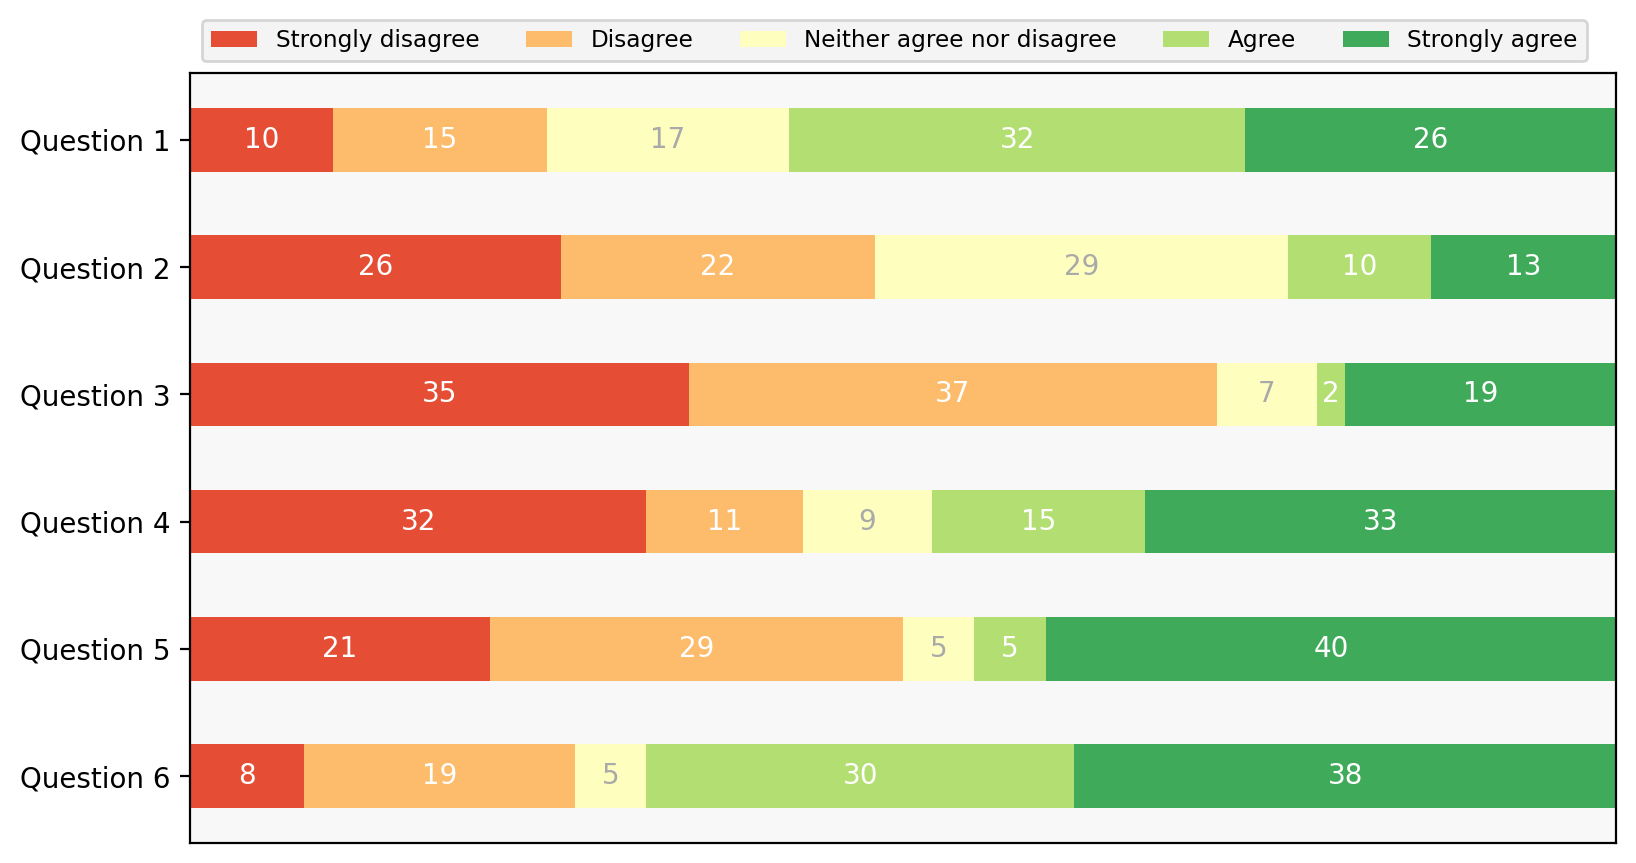

In [13]:
# %load https://matplotlib.org/stable/_downloads/77d0d6c2d02582d80df43b9b9e78610c/horizontal_barchart_distribution.py
"""
=============================================
Discrete distribution as horizontal bar chart
=============================================

Stacked bar charts can be used to visualize discrete distributions.

This example visualizes the result of a survey in which people could rate
their agreement to questions on a five-element scale.

The horizontal stacking is achieved by calling `~.Axes.barh()` for each
category and passing the starting point as the cumulative sum of the
already drawn bars via the parameter ``left``.
"""

import matplotlib.pyplot as plt
import numpy as np

category_names = [
    "Strongly disagree",
    "Disagree",
    "Neither agree nor disagree",
    "Agree",
    "Strongly agree",
]
results = {
    "Question 1": [10, 15, 17, 32, 26],
    "Question 2": [26, 22, 29, 10, 13],
    "Question 3": [35, 37, 7, 2, 19],
    "Question 4": [32, 11, 9, 15, 33],
    "Question 5": [21, 29, 5, 5, 40],
    "Question 6": [8, 19, 5, 30, 38],
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.colormaps["RdYlGn"](np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.grid(False)
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        rects = ax.barh(
            labels, widths, left=starts, height=0.5, label=colname, color=color
        )

        r, g, b, _ = color
        text_color = "white" if r * g * b < 0.5 else "darkgrey"
        ax.bar_label(rects, label_type="center", color=text_color)
    ax.legend(
        ncols=len(category_names),
        bbox_to_anchor=(0, 1),
        loc="lower left",
        fontsize="small",
    )

    return fig, ax


survey(results, category_names)
plt.show()